In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [13]:
read_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TATASTEEL__EQ__NSE__NSE__MINUTE.csv", low_memory=False)
read_df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,392.05,392.15,390.90,390.90,39465.0
1,2017-01-02 09:16:00+05:30,391.00,391.35,390.50,390.90,19199.0
2,2017-01-02 09:17:00+05:30,390.65,390.90,390.10,390.10,19773.0
3,2017-01-02 09:18:00+05:30,390.00,390.00,389.30,389.75,17499.0
4,2017-01-02 09:19:00+05:30,389.75,390.00,389.55,389.80,13701.0


In [14]:
read_df["timestamp"] = [value[:10] for value in read_df["timestamp"]]
read_df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02,392.05,392.15,390.90,390.90,39465.0
1,2017-01-02,391.00,391.35,390.50,390.90,19199.0
2,2017-01-02,390.65,390.90,390.10,390.10,19773.0
3,2017-01-02,390.00,390.00,389.30,389.75,17499.0
4,2017-01-02,389.75,390.00,389.55,389.80,13701.0


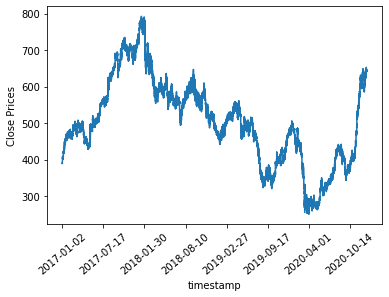

In [15]:
read_df.set_index("timestamp", inplace=True)
read_df['close'].plot()
plt.xticks(rotation=40)
plt.ylabel("Close Prices")
plt.show()

In [17]:
len(read_df)

370546

In [18]:
read_df.dropna(inplace=True)

In [19]:
len(read_df)

370405

In [20]:
read_df.head()

,open,high,low,close,volume
timestamp,,,,,
2017-01-02,392.05,392.15,390.90,390.90,39465.0
2017-01-02,391.00,391.35,390.50,390.90,19199.0
2017-01-02,390.65,390.90,390.10,390.10,19773.0
2017-01-02,390.00,390.00,389.30,389.75,17499.0
2017-01-02,389.75,390.00,389.55,389.80,13701.0


In [80]:
# taking only the recent data
modified_df = read_df.copy(deep=True)
modified_df.head()

,open,high,low,close,volume
timestamp,,,,,
2017-01-02,392.05,392.15,390.90,390.90,39465.0
2017-01-02,391.00,391.35,390.50,390.90,19199.0
2017-01-02,390.65,390.90,390.10,390.10,19773.0
2017-01-02,390.00,390.00,389.30,389.75,17499.0
2017-01-02,389.75,390.00,389.55,389.80,13701.0


In [81]:
modified_df.tail()

,open,high,low,close,volume
timestamp,,,,,
2021-01-01,641.90,641.90,641.45,641.75,9670.0
2021-01-01,641.75,641.85,641.45,641.80,10684.0
2021-01-01,641.65,641.75,641.10,641.40,18094.0
2021-01-01,641.40,641.60,641.25,641.45,21185.0
2021-01-01,641.45,641.85,641.00,641.35,21238.0


In [82]:
len(modified_df[modified_df.index>"2020-11-30"])

8625

In [83]:
modified_df = modified_df[modified_df.index>"2020-11-30"]
modified_df.head()

,open,high,low,close,volume
timestamp,,,,,
2020-12-01,592.00,592.00,581.55,584.70,726964.0
2020-12-01,585.05,587.20,584.00,586.75,406160.0
2020-12-01,586.75,588.45,585.45,588.45,348538.0
2020-12-01,588.75,588.90,585.50,585.55,169421.0
2020-12-01,585.55,587.15,584.95,585.00,149900.0


In [84]:
x = modified_df.drop(["close", "volume"], axis=1)
y = modified_df["close"]
x.head(), y.head()

(              open    high     low
 timestamp                         
 2020-12-01  592.00  592.00  581.55
 2020-12-01  585.05  587.20  584.00
 2020-12-01  586.75  588.45  585.45
 2020-12-01  588.75  588.90  585.50
 2020-12-01  585.55  587.15  584.95, timestamp
 2020-12-01    584.70
 2020-12-01    586.75
 2020-12-01    588.45
 2020-12-01    585.55
 2020-12-01    585.00
 Name: close, dtype: float64)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0, shuffle=False)

In [95]:
x_train[:10]

array([[-1.57533867, -1.60810997, -2.19326356],
       [-2.0097016 , -1.90928781, -2.0407694 ],
       [-1.90345455, -1.83085608, -1.95051775],
       [-1.77845802, -1.80262066, -1.94740563],
       [-1.97845247, -1.91242508, -1.98163901],
       [-2.04720056, -1.99399408, -2.03765727],
       [-2.05970021, -2.08183761, -2.47646701],
       [-2.45343928, -2.29203464, -2.44223362],
       [-2.27219431, -2.1539948 , -2.2461697 ],
       [-2.11594865, -2.13830845, -2.14346955]])

In [86]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [87]:
grid_rf = {
'n_estimators': [ 50, 100, 200],  
'max_depth': [5, 10],  
"criterion": ["squared_error", "absolute_error"]
}
model=RandomForestRegressor(random_state=42)
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=5)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'n_estimators': 200, 'max_depth': 10, 'criterion': 'squared_error'}


In [88]:
rscv.best_score_

0.9958028885400786

In [89]:
model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10, criterion="squared_error")
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict.shape)

(2243,)


In [90]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.2454
Mean Squared Error: 0.2235
Root Mean Squared Error: 0.4728
(R^2) Score: 0.9964
Train Score : 99.99% and Test Score : 99.64% using Random Tree Regressor.
Accuracy: 99.96 %.


In [93]:
len(x_test), len(y_test)

(2243, 2243)

In [97]:
int(0.26 * len(x))

2242

In [99]:
x_axis = modified_df.index[-2242:]
len(x_axis)

2242

In [101]:
x_axis[:10]

Index(['2020-12-24', '2020-12-24', '2020-12-24', '2020-12-24', '2020-12-24',
       '2020-12-24', '2020-12-24', '2020-12-24', '2020-12-24', '2020-12-24'],
      dtype='object', name='timestamp')

In [113]:
pred = pd.DataFrame(data=[x_axis, y_test, predict]).T
pred.columns = ["timestamp", "actual", "prediction"]
pred.set_index("timestamp", inplace=True)
pred.head()

,actual,prediction
timestamp,,
2020-12-24,626.9,626.421392
2020-12-24,627.0,627.101029
2020-12-24,628.1,627.962777
2020-12-24,628.8,627.769072
2020-12-24,630.6,630.049193


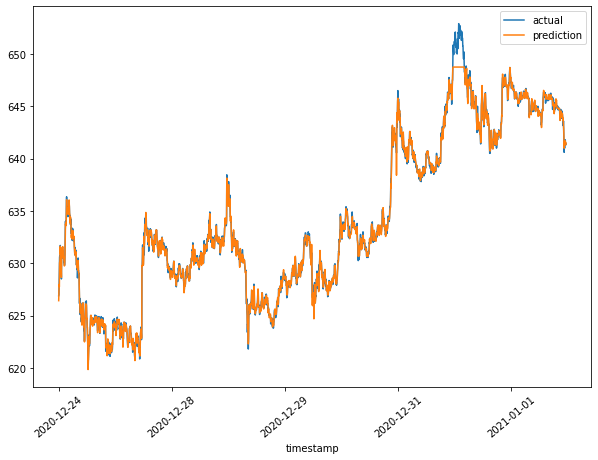

In [125]:
pred.plot(figsize=(10,7))
plt.xticks(rotation=40);

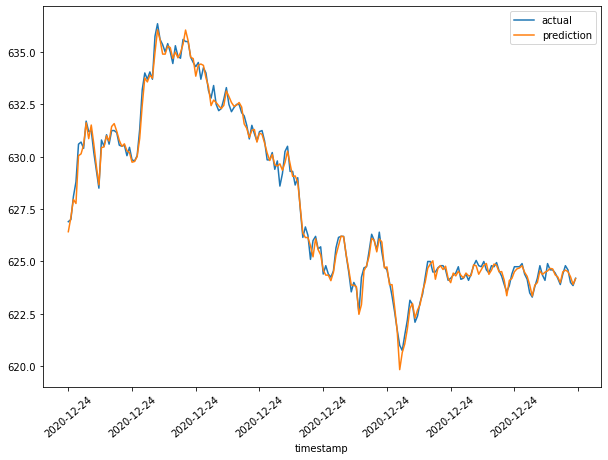

In [126]:
# to get a closer look
pred[:200].plot(figsize=(10,7))
plt.xticks(rotation=40);

In [ ]:
pred.to_csv("Prediction")